In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.cluster import KMeans
#import pylab as pl
from bubbly.bubbly import bubbleplot 
from plotly.graph_objs import Scatter, Figure, Layout

 #importing dataset


In [2]:
dataset2=pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False,low_memory=False)


b'Skipping line 533719: expected 23 fields, saw 24\n'


# Data Preprocessing


# count number of nans 

In [3]:
print(dataset2.isnull().sum())

Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      25
Arrest                     0
Domestic                   0
Beat                       0
District                   5
Ward                      15
Community Area           349
FBI Code                   0
X Coordinate            9154
Y Coordinate            9154
Year                       0
Updated On                 0
Latitude                9154
Longitude               9154
Location                9154
dtype: int64


# Droping Null Values


In [4]:
dataset2=dataset2.dropna(how='any',axis=0)


# Formatting data

In [5]:
dataset2.Date=pd.to_datetime(dataset2.Date,format='%m/%d/%Y %I:%M:%S %p')

# Setting Index To Date


In [6]:
dataset2.index=pd.DatetimeIndex(dataset2.Date)

# Adding Time Hour Grouping  

In [7]:
dataset2['time_hour']=dataset2['Date'].apply(lambda x: x.hour)
dataset2['month']=dataset2['Date'].apply(lambda x: x.month)
dataset2['year']=dataset2['Date'].apply(lambda x: x.year)
dataset2.drop(['Unnamed: 0','Year'],inplace=True,axis=1)


# Analysis of Each Dataset By creating a Word Cloud

# 1.On The Basis on Total Number Of Crimes Made 

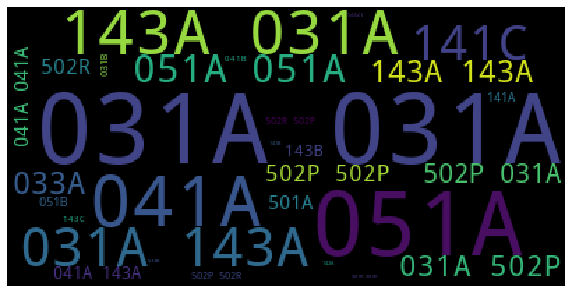

In [8]:
crime_code=" ".join(crime for crime in dataset2['IUCR'])
crime_code_wc=WordCloud().generate(crime_code)
plt.figure(figsize=[10,10])
plt.imshow(crime_code_wc)
plt.axis("off")
plt.show()

# 2. On The Basis on Total Number Of Location of Crimes 

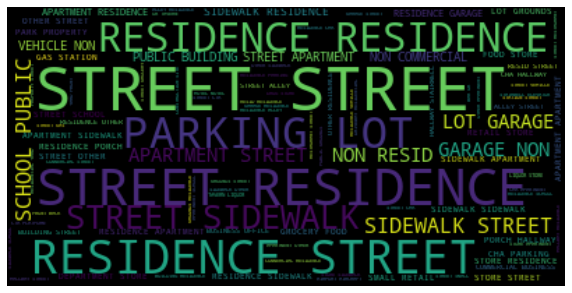

In [9]:
location_des=" ".join(i for i in dataset2['Location Description'])
location_des_wc=WordCloud().generate(location_des)
plt.figure(figsize=[10,10])
plt.imshow(location_des_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

# 3. On The Basis of Total number of Arrest Made 

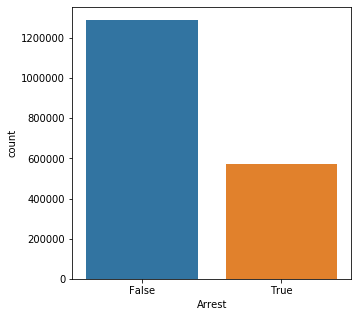

In [10]:
pd.value_counts(dataset2['Arrest'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='Arrest',data=dataset2,order=dataset2['Arrest'].value_counts().index)

#  4. crime rate over years

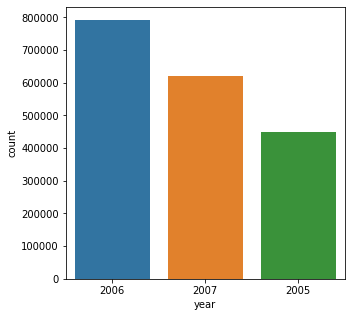

In [11]:
pd.value_counts(dataset2['year'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='year',data=dataset2,order=dataset2['year'].value_counts().index)

#  5. Arrest over period

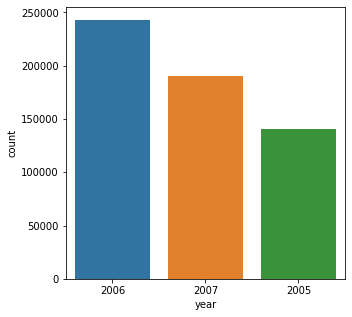

In [12]:
d2=dataset2[dataset2['Arrest']==True]
pd.value_counts(d2['Arrest'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='year',data=d2,order=d2['year'].value_counts().index)

# 6. Monthly Analysis

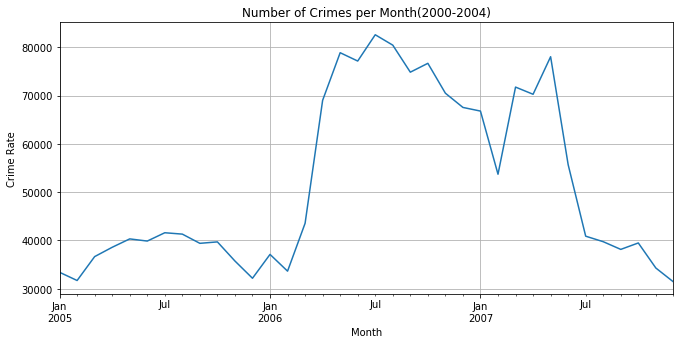

In [13]:
plt.figure(figsize=(11,5))
dataset2.resample('M').size().plot(legend=False,grid=True)
plt.title('Number of Crimes per Month(2000-2004)')
plt.xlabel('Month')
plt.ylabel('Crime Rate')
plt.show()

# 7. Individual Crime type Trend 

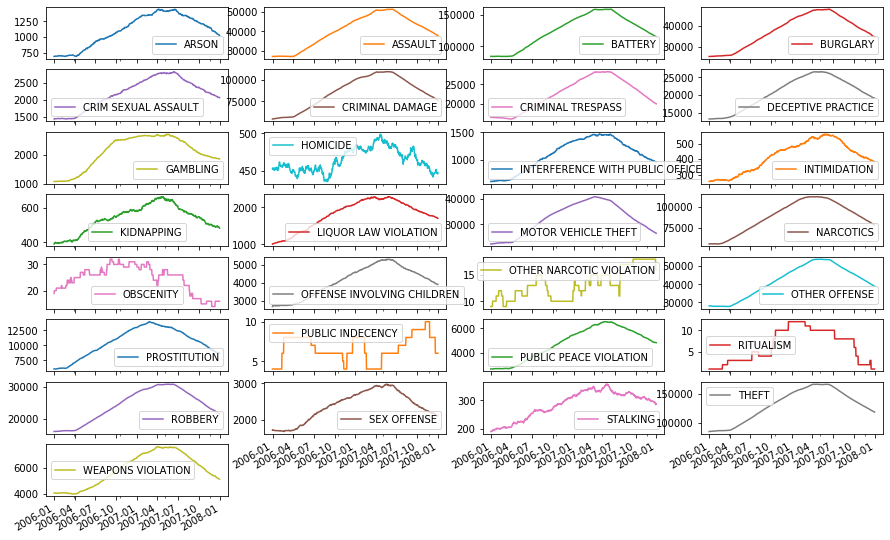

In [14]:
crime_p=dataset2.pivot_table('ID',aggfunc=np.size,columns='Primary Type',index=dataset2.index.date,fill_value=0)
plot=crime_p.rolling(365).sum().plot(figsize=(15,10),subplots=True,layout=(-1,4))

# 8. Individual Crime type-theft over time period 

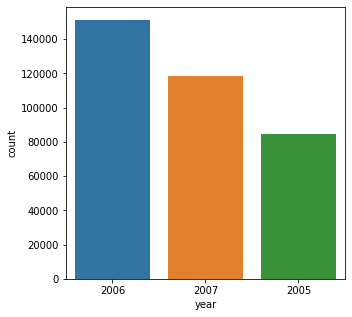

In [15]:
d2=dataset2[dataset2['Primary Type']=='THEFT']
pd.value_counts(d2['Primary Type'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='year',data=d2,order=d2['year'].value_counts().index)

#  Applying K means to find trends

In [16]:
chicago_df=pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False,low_memory=False)
chicago_df.drop(['Unnamed: 0','X Coordinate', 'Y Coordinate','Updated On','Beat','Location'], inplace=True, axis=1)

b'Skipping line 533719: expected 23 fields, saw 24\n'


In [17]:
print(chicago_df.isnull().sum())

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      25
Arrest                     0
Domestic                   0
District                   5
Ward                      15
Community Area           349
FBI Code                   0
Year                       0
Latitude                9154
Longitude               9154
dtype: int64


In [18]:
chicago_df=chicago_df.dropna()

In [19]:
print(chicago_df.isnull().sum())

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
dtype: int64


In [20]:
 #Assembling a datetime by rearranging the dataframe column "Date". 
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')
chicago_df['date']=[d.date() for d in chicago_df['Date']]
chicago_df['time']=[d.time() for d in chicago_df['Date']]
chicago_df['time'] = chicago_df['time'].astype(str)
empty_list = []
for timestr in chicago_df['time'].tolist():
    ftr = [3600,60,1]
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])
    empty_list.append(var)
    
chicago_df['seconds'] = empty_list

chicago_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,date,time,seconds
0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,45.0,11.0,26,2006,41.981913,-87.771996,2006-04-02,13:00:00,46800
1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,20.0,42.0,18,2006,41.775733,-87.611920,2006-02-26,13:40:48,49248
2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,5.0,69.0,04A,2006,41.769897,-87.593671,2006-01-08,23:16:00,83760
3,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,38.0,17.0,08B,2006,41.942984,-87.780057,2006-04-05,18:45:00,67500
4,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,13.0,65.0,18,2006,41.784211,-87.716745,2006-02-17,21:03:14,75794


In [21]:
#Firstly we will cluster our District, Ward and Primary Type(IUCR code) so that we can identify which portions of the city experience criminal attacks of which type.

In [22]:
sub_data = chicago_df[['Ward', 'IUCR', 'District']]
sub_data = sub_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
sub_data['IUCR'] = sub_data.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_data.head()

,Ward,IUCR,District
0,45.0,2825,16.0
1,20.0,2017,3.0
2,5.0,51,3.0
3,38.0,460,16.0
4,13.0,1811,8.0


In [23]:
#normalizing the data
sub_data['IUCR'] = (sub_data['IUCR'] - sub_data['IUCR'].min())/(sub_data['IUCR'].max()-sub_data['IUCR'].min())
sub_data['Ward'] = (sub_data['Ward'] - sub_data['Ward'].min())/(sub_data['Ward'].max()-sub_data['Ward'].min())
sub_data['District'] = (sub_data['District'] - sub_data['District'].min())/(sub_data['District'].max()-sub_data['District'].min())

In [24]:
#checking the optimum number of clusters using elbow method
N = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in N]
kmeans
score = [kmeans[i].fit(sub_data).score(sub_data) for i in range(len(kmeans))]
score
plt.plot(N,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

KeyboardInterrupt: 

In [25]:
km = KMeans(n_clusters=3)
km.fit(sub_data)
y = km.predict(sub_data)
labels = km.labels_
sub_data['Cluster'] = y

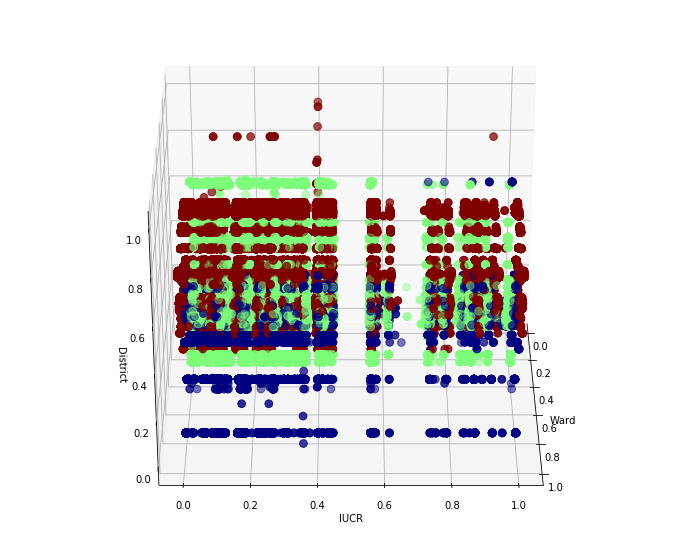

In [26]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data['Ward'])
y = np.array(sub_data['IUCR'])
z = np.array(sub_data['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data["Cluster"], s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

In [27]:
#now clustering based on Time, District and Primary Type(as per IUCR codes). We have to normalize time in seconds to be between 1 and 0, with 0.5 representing the time 12:00 noon (else clusters will only be based on time segments due to large value of time in seconds), that way the clusters will be divided into sections of morning, afternoon and night.
#lower values would indicate midnight to early morning
#medium values would indicate the afternoon sessions
#high values would indicate evening and night time


In [28]:
chicago_df['Normalized_time'] = (chicago_df['seconds'] - chicago_df['seconds'].min())/(chicago_df['seconds'].max()-chicago_df['seconds'].min())

In [29]:
sub_data1 = chicago_df[['IUCR', 'Normalized_time', 'District']]
sub_data1['IUCR'] = sub_data1.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_data1['IUCR'] = (sub_data1['IUCR'] - sub_data1['IUCR'].min())/(sub_data1['IUCR'].max()-sub_data1['IUCR'].min())
sub_data1['District'] = (sub_data1['District'] - sub_data1['District'].min())/(sub_data1['District'].max()-sub_data1['District'].min())
sub_data1.head()

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,IUCR,Normalized_time,District
0,0.561044,0.541673,0.500000
1,0.398795,0.570007,0.066667
2,0.004016,0.969456,0.066667
3,0.086145,0.781259,0.500000
4,0.357430,0.877256,0.233333


In [ ]:
#using elbow method to find optimal number of clusters in kmeans
N = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in N]
kmeans
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
score
pl.plot(N,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [30]:
km = KMeans(n_clusters=4)
km.fit(sub_data1)
y = km.predict(sub_data1)
labels = km.labels_
sub_data1['Clusters'] = y
sub_data1.head()

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IUCR,Normalized_time,District,Clusters
0,0.561044,0.541673,0.500000,1
1,0.398795,0.570007,0.066667,0
2,0.004016,0.969456,0.066667,3
3,0.086145,0.781259,0.500000,1
4,0.357430,0.877256,0.233333,3


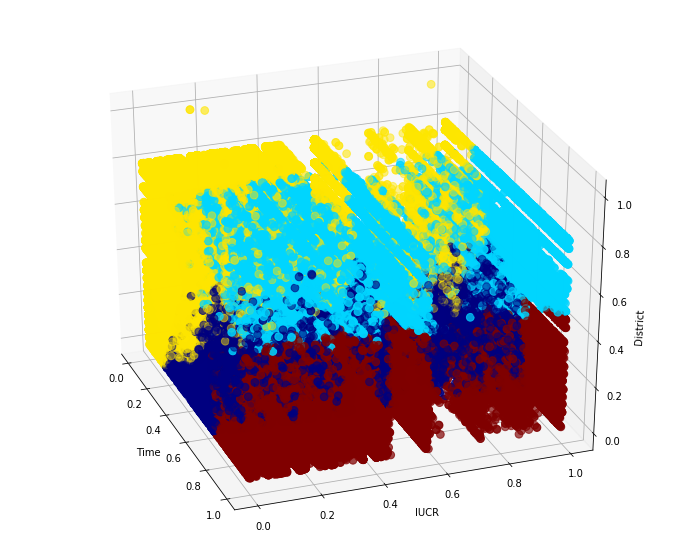

In [31]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data1['Normalized_time'])
y = np.array(sub_data1['IUCR'])
z = np.array(sub_data1['District'])

ax.set_xlabel('Time')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="jet")
ax.view_init(azim=-20)
#print(ax.azim)
plt.show()